<a href="https://colab.research.google.com/github/patryktk/175IC-machine-learning-21176/blob/main/Zab4/Zad4_uczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import load_iris

sns.set()

#gini

def gini(p):
  temp = 0
  for el in p:
    temp += math.pow(el/np.sum(p),2)
  
  return 1 - temp

#entropia
def ent(p):
  return -np.sum(p/np.sum(p) * np.log2(p/np.sum(p)))

ent([50,50,50])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

print(f'Liczba probek:{len(data)}')
print(f'Kształt danych:{data.shape}')
print(f'Nazwy zmiennych: {feature_names}')
print(f'Nazwy klas: {target_names}')

data = pd.DataFrame(data=data,columns= feature_names)
target = pd.DataFrame(data = target, columns = ['target'])


data.pop('petal width (cm)')
data.pop('petal length (cm)')

plt.scatter(data['sepal length (cm)'][:50], data['sepal width (cm)'][:50], c='Blue', marker='X')
plt.scatter(data['sepal length (cm)'][51:100], data['sepal width (cm)'][51:100], c='Red', marker='X')
plt.scatter(data['sepal length (cm)'][101:], data['sepal width (cm)'][101:], c='Green', marker='*')

depth =1 #głębokość grafów
classifier = DecisionTreeClassifier(max_depth = depth) #klasyfikator
classifier.fit(data,target)

acc = classifier.score(data,target) #dokładność
plt.figure(figsize=(10,7))
plot_decision_regions(np.array(data), np.array(target).reshape(150), classifier)
plt.title(f'Max_depth = {depth}, accuracy = {acc:.2}')
plt.show()

In [ ]:

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2],class_names=target_names, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [36]:
def make_decision_tree(max_depth = 1):
  classifier = DecisionTreeClassifier(max_depth = max_depth)
  classifier.fit(data,target)

  dot_data = StringIO()
  export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2],class_names=target_names, filled = True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

  acc = classifier.score(data,target)

  plt.figure(figsize=(10,7))
  plot_decision_regions(np.array(data), np.array(target).reshape(150), classifier)
  plt.title(f'Max_depth = {depth}, accuracy = {acc:.2}')
  plt.show()

  return Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


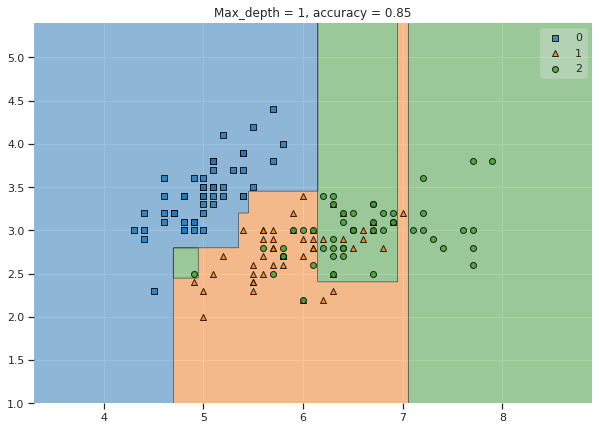

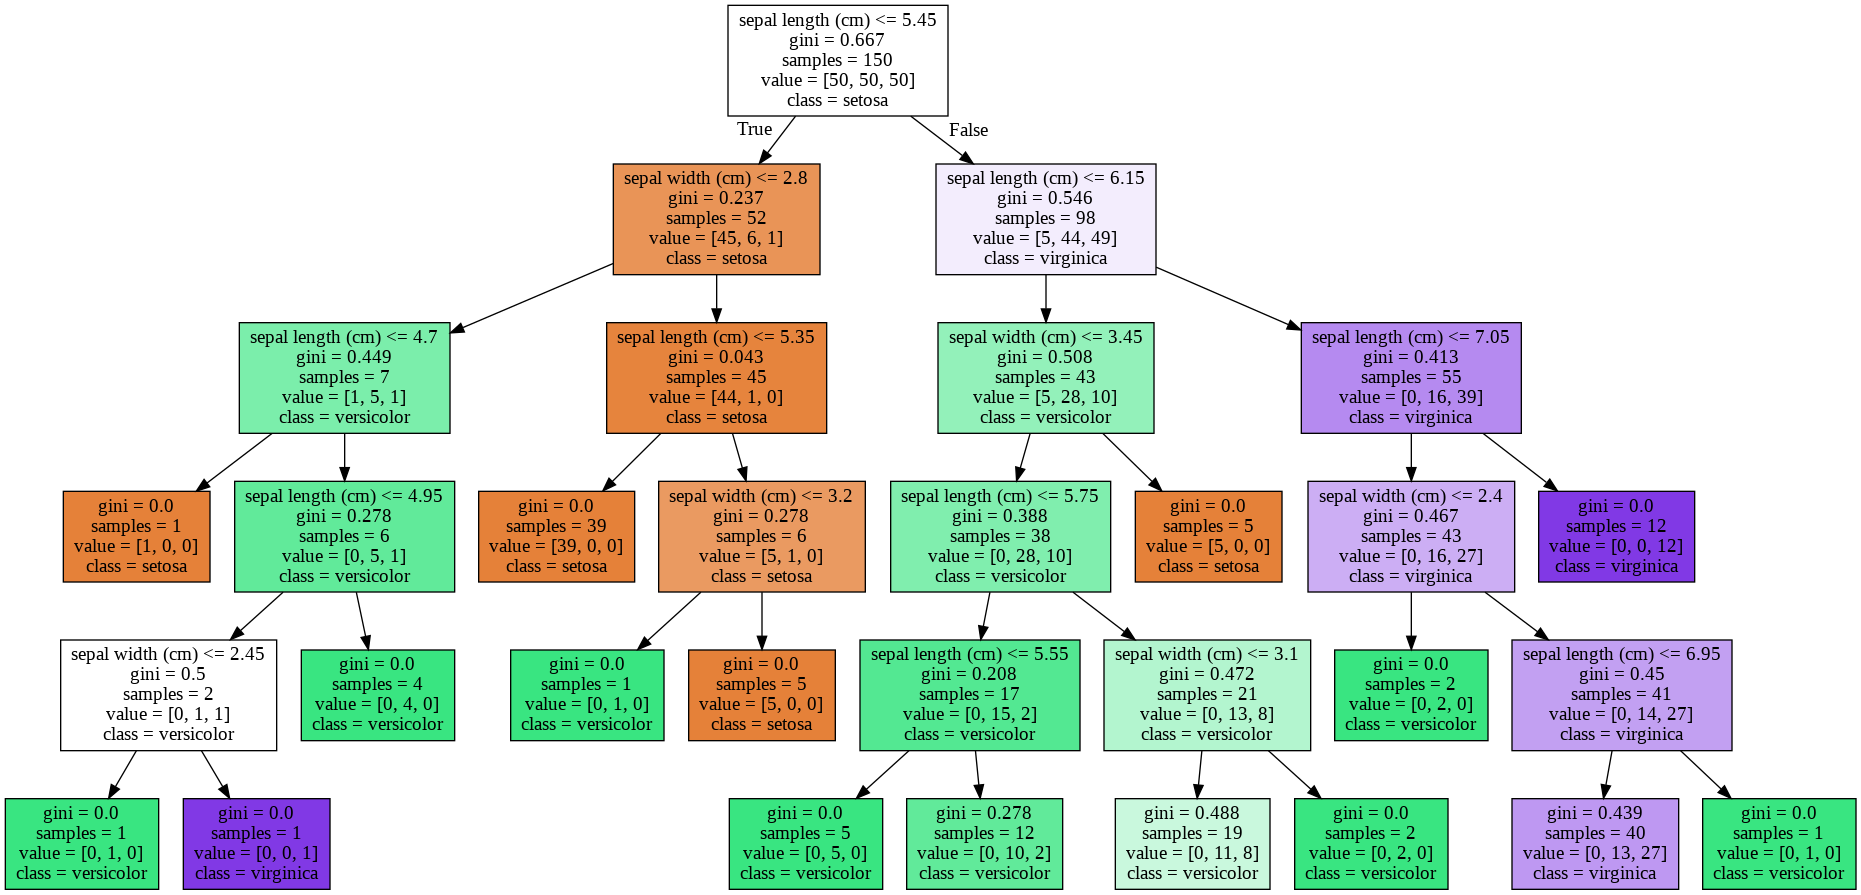

In [37]:
make_decision_tree(5)